# First lin reg model 

In [187]:
import pandas as pd
import numpy as np
import yfinance as yf
#Imports
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../raw_data/Raw_data_number_one.csv")
df

,Ticker,2023 Treasury Shares Number,2023 Ordinary Shares Number,2023 Share Issued,2023 Net Debt,2023 Total Debt,2023 Tangible Book Value,2023 Invested Capital,2023 Working Capital,2023 Net Tangible Assets,...,2024 Interest Paid Cff,2024 Interest Received Cfi,2024 Taxes Refund Paid,2024 Earnings From Equity Interest Net Of Tax,2024 Rent Expense Supplemental,2024 Rent And Landing Fees,2019 Depletion Income Statement,2024 Financial Assets,2024 Cash From Discontinued Financing Activities,2024 Accrued Interest Receivable
0,AAL,0.0,6.542732e+08,6.542732e+08,3.232400e+10,4.066300e+10,-1.134400e+10,2.770000e+10,-8.490000e+09,-1.134400e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAOI,NaN,3.814800e+07,3.814800e+07,6.983200e+07,1.210730e+08,2.062110e+08,3.300670e+08,7.924700e+07,2.062110e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAON,NaN,8.150838e+07,8.150838e+07,3.804100e+07,5.055000e+07,5.852790e+08,7.735520e+08,2.822050e+08,5.852790e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,0.0,1.555006e+10,1.555006e+10,8.112300e+10,1.110880e+11,6.214600e+10,1.732340e+11,-1.742000e+09,6.214600e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,ZKIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1764,ZLAB,4912200.0,9.722391e+08,9.771513e+08,NaN,1.515100e+07,7.796600e+08,7.961180e+08,7.365390e+08,7.796600e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765,ZS,NaN,1.471690e+08,1.471690e+08,NaN,1.210545e+09,6.100610e+08,1.859271e+09,1.354446e+09,6.100610e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1766,ZUMZ,NaN,1.948900e+07,1.948900e+07,NaN,2.542950e+08,3.363190e+08,4.073280e+08,1.943690e+08,3.363190e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409000.0


In [8]:
#CLEANING THE DATA:

#drop columns that have more than 30% of missing data:
def remove_shitty_columns(df):
    for column in df.columns:
        if df[column].isnull().sum()/len(df) > 0.3:
            df.drop(columns=[column], inplace=True)
    return df


#drop rows that have more than 30% of missing values
def remove_shitty_rows(df):
    threshold = 0.3 * df.shape[1]  # Calculate the threshold for missing values
    df = df.dropna(thresh=int(df.shape[1] - threshold))
    return df

#FINAL CLEANING FUNCTION
def clean_dataframe(df):
    df = remove_shitty_columns(df)
    df = remove_shitty_rows(df)
    df = df.reset_index(drop=True)
    return df


#PREPROCESSING
def preprocessing_the_data(df):
    #use simple impute with strategy = "constant"
    imputer = SimpleImputer(strategy="constant", fill_value=0)

    #Robust Scaler to Scale data because of outliers
    rb_scaler = RobustScaler()

    #select numerical columns
    num_transformer = make_pipeline(imputer, rb_scaler)
    num_columns = make_column_selector(dtype_exclude="object")

    #Create Preproc Pipeline
    preproc_basic = make_column_transformer((num_transformer, num_columns))

    #Apply Preprocessing to dataframe
    preprocessed_data = preproc_basic.fit_transform(df)

    #Change column names of transformed dataframe
    df_preproc = pd.DataFrame(preprocessed_data, columns=preproc_basic.get_feature_names_out())

    #Merge with tickers
    df_preproc = df_preproc.join(df.Ticker)

    return df_preproc

In [13]:
df = clean_dataframe(df)
df = preprocessing_the_data(df)

In [14]:
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Payable,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ticker
0,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,AAL
1,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,1.987660,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,AAOI
2,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,1.772945,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,AAON
3,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1457.337652,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,AAPL
4,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.745180,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,ABCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.345662,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,ZKIN
1645,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-8.306802,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,ZLAB
1646,1.431302,1.311495,1.490422,0.972263,0.775329,4.254469,0.968732,1.221899,0.450251,0.802190,...,2.202375,2.544986,-10.942881,0.764057,0.925482,-10.673759,0.247275,0.294701,-12.049333,ZS
1647,-0.223838,-0.250516,0.175646,0.419906,-0.032106,0.464420,0.418381,4.419469,0.134931,-0.022750,...,-2.967916,-2.508001,0.046615,2.349883,2.608246,0.022523,0.000000,0.000000,0.000000,ZUMZ


In [20]:
# Get the list of NASDAQ companies
nasdaq_tickers = pd.read_csv('../raw_data/nasdaq_tickers_raw.csv')
#nasdaq_tickers= pd.read_csv('https://datahub.io/core/nasdaq-listings/r/nasdaq-listed-symbols.csv')
tickers_total = nasdaq_tickers['Symbol'].tolist()

In [21]:
len(tickers_total)

7133

In [23]:
date = datetime(2024, 5, 15)
date

datetime.datetime(2024, 5, 15, 0, 0)

In [69]:
stock_prices = stock_prices.T.copy()
stock_prices

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
Unnamed: 0,NaN,Date,2023-05-22 00:00:00-04:00,2023-05-23 00:00:00-04:00,2023-05-24 00:00:00-04:00,2023-05-25 00:00:00-04:00,2023-05-26 00:00:00-04:00,2023-05-30 00:00:00-04:00,2023-05-31 00:00:00-04:00,2023-06-01 00:00:00-04:00,...,2024-05-08 00:00:00-04:00,2024-05-09 00:00:00-04:00,2024-05-10 00:00:00-04:00,2024-05-13 00:00:00-04:00,2024-05-14 00:00:00-04:00,2024-05-15 00:00:00-04:00,2024-05-16 00:00:00-04:00,2024-05-17 00:00:00-04:00,2024-05-20 00:00:00-04:00,2024-05-21 00:00:00-04:00
A,Open,NaN,127.73250042946057,128.09984205990662,114.36952171614824,120.53476565689053,119.20441218548544,119.14485664422924,116.14661971223205,116.1267709994226,...,141.119995,143.110001,145.889999,149.529999,148.75,153.0,152.570007,154.509995,153.970001,154.350006
A.1,High,NaN,128.81463904079908,129.59895125673663,120.2170601792365,120.53476565689053,119.849727834765,120.43548047123163,116.30546991169288,116.7919391889,...,143.0,145.479996,152.809998,150.259995,151.550003,154.550003,154.839996,155.350006,154.949997,154.649994
A.2,Low,NaN,127.36515743891897,126.98792080921366,112.46336478823777,116.79193913683523,117.52659301223736,116.8217216365935,113.97241252147136,114.17097140775188,...,140.039993,142.820007,145.119995,147.179993,148.380005,152.509995,152.570007,153.029999,153.470001,152.339996
A.3,Close,NaN,128.15939331054688,127.71265411376953,120.11778259277344,118.62860107421875,119.55188751220703,116.88129425048828,114.83613586425781,115.42189025878906,...,142.800003,145.139999,149.759995,147.759995,151.279999,154.080002,154.309998,154.229996,154.639999,153.669998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYXI.2,Low,NaN,9.5600004196167,9.550000190734863,9.359999656677246,9.3100004196167,9.149999618530273,9.130000114440918,9.220000267028809,9.260000228881836,...,10.65,10.31,10.43,10.4,10.73,10.89,10.86,10.84,10.56,10.45
ZYXI.3,Close,NaN,9.760000228881836,9.670000076293945,9.550000190734863,9.380000114440918,9.399999618530273,9.289999961853027,9.380000114440918,9.5600004196167,...,10.73,10.34,10.49,10.68,10.86,11.01,11.0,10.88,10.56,10.58
ZYXI.4,Volume,NaN,256800,499900,184800,112600,242400,164400,191400,285100,...,64600,152600,162000,99800,94700,78400,62700,62000,67000,58697
ZYXI.5,Dividends,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
stock_close = stock_prices[stock_prices[0] == "Close"][[0, 2, 253]]
stock_close

,0,2,253
A.3,Close,128.15939331054688,153.669998
AA.3,Close,35.92049789428711,44.09
AACG.3,Close,1.5199999809265137,0.9501
AACI.3,Close,10.270000457763672,11.4874
AACIW.3,Close,NaN,NaN
...,...,...,...
ZVRA.3,Close,5.639999866485596,4.62
ZVSA.3,Close,167.3000030517578,4.4
ZWS.3,Close,22.709999084472656,32.66
ZYME.3,Close,9.1899995803833,8.91


In [81]:
stock_close["2023_stock_price"] = pd.to_numeric(stock_close[2])
stock_close

,0,2,253,2023_stock_price
A.3,Close,128.15939331054688,153.669998,128.159393
AA.3,Close,35.92049789428711,44.09,35.920498
AACG.3,Close,1.5199999809265137,0.9501,1.520000
AACI.3,Close,10.270000457763672,11.4874,10.270000
AACIW.3,Close,NaN,NaN,NaN
...,...,...,...,...
ZVRA.3,Close,5.639999866485596,4.62,5.640000
ZVSA.3,Close,167.3000030517578,4.4,167.300003
ZWS.3,Close,22.709999084472656,32.66,22.709999
ZYME.3,Close,9.1899995803833,8.91,9.190000


In [82]:
stock_close["Ratio_between_2023_and_2024"] = stock_close[253] / stock_close["2023_stock_price"]
stock_close

,0,2,253,2023_stock_price,Ratio_between_2023_and_2024
A.3,Close,128.15939331054688,153.669998,128.159393,1.199054
AA.3,Close,35.92049789428711,44.09,35.920498,1.227433
AACG.3,Close,1.5199999809265137,0.9501,1.520000,0.625066
AACI.3,Close,10.270000457763672,11.4874,10.270000,1.118539
AACIW.3,Close,NaN,NaN,NaN,NaN
...,...,...,...,...,...
ZVRA.3,Close,5.639999866485596,4.62,5.640000,0.819149
ZVSA.3,Close,167.3000030517578,4.4,167.300003,0.0263
ZWS.3,Close,22.709999084472656,32.66,22.709999,1.438133
ZYME.3,Close,9.1899995803833,8.91,9.190000,0.969532


In [83]:
stock_close = stock_close.reset_index()
stock_close

,index,0,2,253,2023_stock_price,Ratio_between_2023_and_2024
0,A.3,Close,128.15939331054688,153.669998,128.159393,1.199054
1,AA.3,Close,35.92049789428711,44.09,35.920498,1.227433
2,AACG.3,Close,1.5199999809265137,0.9501,1.520000,0.625066
3,AACI.3,Close,10.270000457763672,11.4874,10.270000,1.118539
4,AACIW.3,Close,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7064,ZVRA.3,Close,5.639999866485596,4.62,5.640000,0.819149
7065,ZVSA.3,Close,167.3000030517578,4.4,167.300003,0.0263
7066,ZWS.3,Close,22.709999084472656,32.66,22.709999,1.438133
7067,ZYME.3,Close,9.1899995803833,8.91,9.190000,0.969532


In [84]:
stock_close["Ticker"] = stock_close["index"].apply(lambda x: x.split(".")[0])
stock_close

,index,0,2,253,2023_stock_price,Ratio_between_2023_and_2024,Ticker
0,A.3,Close,128.15939331054688,153.669998,128.159393,1.199054,A
1,AA.3,Close,35.92049789428711,44.09,35.920498,1.227433,AA
2,AACG.3,Close,1.5199999809265137,0.9501,1.520000,0.625066,AACG
3,AACI.3,Close,10.270000457763672,11.4874,10.270000,1.118539,AACI
4,AACIW.3,Close,NaN,NaN,NaN,NaN,AACIW
...,...,...,...,...,...,...,...
7064,ZVRA.3,Close,5.639999866485596,4.62,5.640000,0.819149,ZVRA
7065,ZVSA.3,Close,167.3000030517578,4.4,167.300003,0.0263,ZVSA
7066,ZWS.3,Close,22.709999084472656,32.66,22.709999,1.438133,ZWS
7067,ZYME.3,Close,9.1899995803833,8.91,9.190000,0.969532,ZYME


In [85]:
stock_clean = stock_close.drop(columns=[0, 2, 253, "index", "2023_stock_price"])
stock_clean

,Ratio_between_2023_and_2024,Ticker
0,1.199054,A
1,1.227433,AA
2,0.625066,AACG
3,1.118539,AACI
4,NaN,AACIW
...,...,...
7064,0.819149,ZVRA
7065,0.0263,ZVSA
7066,1.438133,ZWS
7067,0.969532,ZYME


In [86]:
df = df.merge(stock_clean, how="left", on="Ticker")
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ticker,Y-Target: Stock Price May 2024,Ratio_between_2023_and_2024
0,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,AAL,14.380000114440918,0.975661
1,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,AAOI,1.7599999904632568,6.818182
2,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,AAON,60.095333099365234,1.277803
3,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,AAPL,173.2797393798828,1.110055
4,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,ABCB,31.540142059326172,1.575136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,ZKIN,0.7300000190734863,1.01589
1645,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,ZLAB,34.2400016784668,0.584404
1646,1.431302,1.311495,1.490422,0.972263,0.775329,4.254469,0.968732,1.221899,0.450251,0.802190,...,-10.942881,0.764057,0.925482,-10.673759,0.247275,0.294701,-12.049333,ZS,128.86000061035156,1.373428
1647,-0.223838,-0.250516,0.175646,0.419906,-0.032106,0.464420,0.418381,4.419469,0.134931,-0.022750,...,0.046615,2.349883,2.608246,0.022523,0.000000,0.000000,0.000000,ZUMZ,16.309999465942383,1.126916


In [87]:
df = df.drop(columns=["Y-Target: Stock Price May 2024"])
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ticker,Ratio_between_2023_and_2024
0,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,AAL,0.975661
1,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,AAOI,6.818182
2,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,AAON,1.277803
3,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,AAPL,1.110055
4,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,ABCB,1.575136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,ZKIN,1.01589
1645,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,ZLAB,0.584404
1646,1.431302,1.311495,1.490422,0.972263,0.775329,4.254469,0.968732,1.221899,0.450251,0.802190,...,2.544986,-10.942881,0.764057,0.925482,-10.673759,0.247275,0.294701,-12.049333,ZS,1.373428
1647,-0.223838,-0.250516,0.175646,0.419906,-0.032106,0.464420,0.418381,4.419469,0.134931,-0.022750,...,-2.508001,0.046615,2.349883,2.608246,0.022523,0.000000,0.000000,0.000000,ZUMZ,1.126916


In [90]:
#df.set_index("Ticker", inplace=True)
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Payable,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ratio_between_2023_and_2024
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,0.975661
AAOI,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,1.987660,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,6.818182
AAON,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,1.772945,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,1.277803
AAPL,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1457.337652,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,1.110055
ABCB,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.745180,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,1.575136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZKIN,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.345662,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,1.01589
ZLAB,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-8.306802,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,0.584404
ZS,1.431302,1.311495,1.490422,0.972263,0.775329,4.254469,0.968732,1.221899,0.450251,0.802190,...,2.202375,2.544986,-10.942881,0.764057,0.925482,-10.673759,0.247275,0.294701,-12.049333,1.373428


In [92]:
df["Ratio_between_2023_and_2024"].isna()

Ticker
AAL     False
AAOI    False
AAON    False
AAPL    False
ABCB    False
        ...  
ZKIN    False
ZLAB    False
ZS      False
ZUMZ    False
true     True
Name: Ratio_between_2023_and_2024, Length: 1649, dtype: bool

In [95]:
df = df.dropna(subset=["Ratio_between_2023_and_2024"]) 

In [96]:
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Payable,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ratio_between_2023_and_2024
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,0.975661
AAOI,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,1.987660,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,6.818182
AAON,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,1.772945,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,1.277803
AAPL,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1457.337652,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,1.110055
ABCB,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.745180,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,1.575136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,1.444057,1.323533,2.667988,8.199904,3.808738,-0.170596,9.054724,-0.079099,4.941048,3.284907,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,1.567818
ZKIN,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.345662,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,1.01589
ZLAB,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-8.306802,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,0.584404


In [103]:
target = pd.read_csv("../raw_data/tickers_target.csv")
target

,Unnamed: 0,Ticker,Ratio ticker sp500
0,0,AAL,0.785045
1,1,AAOI,4.957467
2,2,AAON,0.974026
3,3,AAPL,0.860731
4,4,ABCB,1.232920
...,...,...,...
1644,1644,ZKIN,0.749892
1645,1645,ZLAB,0.487622
1646,1646,ZS,1.194828
1647,1647,ZUMZ,0.843950


In [104]:
target = target.drop(columns=["Unnamed: 0"])
target

,Ticker,Ratio ticker sp500
0,AAL,0.785045
1,AAOI,4.957467
2,AAON,0.974026
3,AAPL,0.860731
4,ABCB,1.232920
...,...,...
1644,ZKIN,0.749892
1645,ZLAB,0.487622
1646,ZS,1.194828
1647,ZUMZ,0.843950


In [105]:
target = target.set_index("Ticker")
target

,Ratio ticker sp500
Ticker,
AAL,0.785045
AAOI,4.957467
AAON,0.974026
AAPL,0.860731
ABCB,1.232920
...,...
ZKIN,0.749892
ZLAB,0.487622
ZS,1.194828


In [115]:
df = df.join(target, how="left")
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ratio_between_2023_and_2024,Ratio ticker sp500
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,0.975661,0.785045
AAOI,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,6.818182,4.957467
AAON,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,1.277803,0.974026
AAPL,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,1.110055,0.860731
ABCB,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,1.575136,1.232920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,1.444057,1.323533,2.667988,8.199904,3.808738,-0.170596,9.054724,-0.079099,4.941048,3.284907,...,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,1.567818,1.350189
ZKIN,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,1.01589,0.749892
ZLAB,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,0.584404,0.487622


In [116]:
df["Ratio ticker sp500"]

Ticker
AAL     0.785045
AAOI    4.957467
AAON    0.974026
AAPL    0.860731
ABCB    1.232920
          ...   
ZION    1.350189
ZKIN    0.749892
ZLAB    0.487622
ZS      1.194828
ZUMZ    0.843950
Name: Ratio ticker sp500, Length: 1564, dtype: float64

In [118]:
df = df.drop(columns=["Ratio_between_2023_and_2024"])
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2022 Change In Payable,pipeline__2022 Change In Account Payable,pipeline__2022 Changes In Account Receivables,pipeline__2021 Change In Payable,pipeline__2021 Change In Account Payable,pipeline__2021 Changes In Account Receivables,pipeline__2020 Change In Payable,pipeline__2020 Change In Account Payable,pipeline__2020 Changes In Account Receivables,Ratio ticker sp500
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,0.785045
AAOI,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,1.987660,2.297475,-0.930844,0.723637,0.877317,-0.650278,-0.959839,-1.144274,-1.871333,4.957467
AAON,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,1.772945,2.049964,-4.270337,1.129854,1.360232,-0.910677,-0.618187,-0.736752,4.413111,0.974026
AAPL,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,1457.337652,1679.935100,-139.721843,1307.633248,1554.140588,-970.362756,-1165.232358,-1388.717949,1537.111111,0.860731
ABCB,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,1.745180,1.097440,-1.496358,0.592086,-0.162149,1.875791,-5.191624,-2.063590,-5.309333,1.232920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,1.444057,1.323533,2.667988,8.199904,3.808738,-0.170596,9.054724,-0.079099,4.941048,3.284907,...,-0.012340,-0.008001,0.046615,-0.026416,-0.013996,0.022523,0.000000,0.000000,0.000000,1.350189
ZKIN,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,1.345662,1.557419,-0.877990,-0.953617,-1.106238,0.578844,1.558635,1.908645,-1.066864,0.749892
ZLAB,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,-8.306802,-9.569346,0.378594,6.712603,7.995335,-4.033353,11.469019,13.668718,-0.305556,0.487622


In [121]:
df["Ratio ticker sp500"].isna().sum()

2

In [122]:
df = df.dropna(subset=["Ratio ticker sp500"]) 
df["Ratio ticker sp500"].isna().sum()

0

In [123]:
df.to_csv("raw_data_first_version_with_good_target.csv")

# Train Test Split data

In [193]:
df.shape

(1562, 440)

In [124]:
X = df.drop(columns=["Ratio ticker sp500"])
y = df["Ratio ticker sp500"]

In [125]:
X.shape

(1562, 439)

In [126]:
y.shape

(1562,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Try out first Model

## Linear Regression

In [130]:
model = LinearRegression()

In [131]:
cv_results = cross_validate(model, X_train, y_train, cv=5)
cv_results

{'fit_time': array([0.25414896, 0.29810095, 0.24453354, 0.36003613, 0.24832797]),
 'score_time': array([0.03397799, 0.08603907, 0.02419829, 0.11103678, 0.03029799]),
 'test_score': array([-2.76403625e+02, -1.26711116e+06, -4.13638450e+04, -1.11718000e+07,
        -1.13764470e+06])}

In [133]:
ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)


/Users/manonantonacci/.pyenv/versions/3.10.6/envs/project_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.780e+01, tolerance: 3.708e-02
  model = cd_fast.enet_coordinate_descent(


In [135]:
cross_validate(ridge, X_train, y_train, cv=5)

{'fit_time': array([0.30706191, 0.31287217, 0.25660229, 0.25805306, 0.26308298]),
 'score_time': array([0.02666712, 0.0122478 , 0.00350165, 0.01761413, 0.01003814]),
 'test_score': array([-4.68884518e+01, -3.97790877e+04, -5.05082228e+01, -1.08080811e+06,
        -2.35469969e+01])}

## Random Forest Regression

In [137]:
forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X_train, y_train, scoring = "r2", cv=5)



NameError: name 'plot_histogram_cv_results' is not defined

In [139]:
cv_results["test_score"].mean()

0.18576174066431564

In [156]:
cv_results

{'fit_time': array([15.03050804, 17.10329795, 18.3200798 , 16.89071584, 16.63045979]),
 'score_time': array([0.00620484, 0.00665092, 0.00974298, 0.00694489, 0.0062232 ]),
 'test_score': array([ 0.33944258,  0.28814214,  0.31458145,  0.16017068, -0.17352815])}

## Baseline Dummy Model

In [142]:
#Baseline target:
y_pred_baseline = df["pipeline__2023 Ratio ticker sp500"]
y_pred_baseline

Ticker
AAL      0.110173
AAOI    17.045832
AAON     0.937091
AAPL     0.587249
ABCB     0.279406
          ...    
ZION    -0.164430
ZKIN    -1.900304
ZLAB    -0.289921
ZS       0.316123
ZUMZ    -0.408094
Name: pipeline__2023 Ratio ticker sp500, Length: 1562, dtype: float64

In [144]:
y_true_baseline = df["Ratio ticker sp500"]
y_true_baseline

Ticker
AAL     0.785045
AAOI    4.957467
AAON    0.974026
AAPL    0.860731
ABCB    1.232920
          ...   
ZION    1.350189
ZKIN    0.749892
ZLAB    0.487622
ZS      1.194828
ZUMZ    0.843950
Name: Ratio ticker sp500, Length: 1562, dtype: float64

In [146]:
mae = mean_absolute_error(y_true_baseline, y_pred_baseline)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 1.0472806822746021


In [147]:
mse = mean_squared_error(y_true_baseline, y_pred_baseline)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 2.4741692063688645


In [150]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.5729492065444657


In [151]:
r2 = r2_score(y_true_baseline, y_pred_baseline)
print(f"R-squared (R²): {r2}")


R-squared (R²): -5.552303916990658


In [154]:
y_pred_baseline_mean = df["pipeline__2023 Ratio ticker sp500"].mean()
y_pred_baseline_mean

0.2179689534420918

# PCA to check how many features are acutally important

In [ ]:
#pca = PCA()
#pca.fit(X)

# Access our 13 PCs 
#W = pca.components_

# Print PCs as COLUMNS
#W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
#W

#) Project our dataset into this new space of PCs

#X_proj = pca.transform(X)
#X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 14)])
#X_proj

In [158]:
pca = PCA()

In [159]:
pca.fit(X_train)

PCA()

In [166]:
W = pca.components_

W

array([[ 3.43124317e-05,  3.21872491e-05,  1.22183588e-03, ...,
         2.40820511e-05, -5.85845501e-05,  4.11375057e-05],
       [-4.44107923e-04, -4.18263705e-04, -4.39116735e-03, ...,
         2.00086018e-02, -1.65782307e-03,  2.85855850e-03],
       [ 2.24923867e-03,  2.12744835e-03,  4.96526808e-04, ...,
         2.00691131e-02,  1.82516438e-02, -2.01616965e-02],
       ...,
       [ 0.00000000e+00, -8.30967187e-16,  6.08657118e-15, ...,
         9.16150836e-18,  8.13151629e-18, -1.51788304e-17],
       [-0.00000000e+00,  4.41814394e-15, -1.85167470e-14, ...,
         8.67361738e-18,  1.30104261e-18, -2.56955915e-17],
       [ 0.00000000e+00, -1.18937857e-13,  3.00451429e-13, ...,
         3.21964677e-15, -8.60422844e-16, -3.38618023e-15]])

In [167]:
X_proj = pca.transform(X)

In [168]:
X_proj

array([[-1.15486066e+03, -1.55768824e+03, -3.22108670e+02, ...,
        -1.14891820e-14,  2.14273044e-14, -6.67521594e-13],
       [-4.65688375e+02,  1.14501709e+02, -1.85702039e+02, ...,
        -2.98589278e-16,  6.26755592e-15, -8.87623308e-14],
       [-4.68267287e+02,  1.12770487e+02, -1.83551857e+02, ...,
        -7.84853953e-16,  1.71824360e-15,  1.82354132e-14],
       ...,
       [-4.67526864e+02,  1.23833654e+02, -1.89952508e+02, ...,
        -8.68185732e-15,  3.75394160e-15, -1.04462272e-12],
       [-4.38151924e+02,  1.16564632e+02, -1.82907266e+02, ...,
         1.12735342e-15,  2.82846663e-15, -6.83203494e-14],
       [-4.53415740e+02,  1.01799765e+02, -9.90108705e+01, ...,
         6.78927400e-16,  3.82506526e-16, -1.70141679e-14]])

In [174]:
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 440)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC430,PC431,PC432,PC433,PC434,PC435,PC436,PC437,PC438,PC439
0,-1154.860662,-1557.688243,-322.108670,-201.140026,128.832341,-205.055410,310.249406,-1946.772064,-1478.220124,1345.985689,...,4.322515e-13,-1.387467e-13,-1.277962e-13,-9.896944e-14,-3.662869e-14,8.587380e-14,5.912805e-15,-1.148918e-14,2.142730e-14,-6.675216e-13
1,-465.688375,114.501709,-185.702039,-55.198708,28.547367,19.343596,5.749012,15.810016,13.757910,16.917036,...,-1.389167e-14,4.697631e-15,5.973087e-15,7.632783e-16,2.043504e-15,1.934217e-16,3.121418e-16,-2.985893e-16,6.267556e-15,-8.876233e-14
2,-468.267287,112.770487,-183.551857,-50.466444,28.885567,21.389066,2.061532,11.371384,16.204103,17.543032,...,8.784640e-15,1.967176e-15,-4.324666e-15,-4.898859e-15,-1.530026e-15,1.134075e-16,1.816689e-15,-7.848540e-16,1.718244e-15,1.823541e-14
3,-464.007762,-7353.940299,43032.473007,-812.244485,-115.571030,986.598957,-2246.420341,-1403.226186,2451.992080,302.461024,...,3.326728e-12,7.580395e-14,-3.081200e-12,-2.580242e-12,-8.703854e-13,5.542543e-13,2.399452e-13,-6.064723e-14,3.644936e-13,-4.544443e-11
4,-402.305327,11.962153,-149.867995,-26.460252,4.872707,44.037538,-18.954362,-28.284315,43.826583,-107.008133,...,5.027923e-14,-6.104839e-14,1.713560e-14,9.707513e-15,2.193384e-14,-2.248418e-15,2.873895e-15,-1.282611e-16,-7.293211e-15,7.694817e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,-420.671793,-129.871696,1301.099734,-125.153535,14.517387,43.148321,44.851902,178.767881,65.951847,-40.969356,...,3.218259e-14,-2.383163e-14,3.888816e-15,2.044892e-14,2.972102e-14,1.119460e-14,7.194766e-16,-1.380081e-15,5.217181e-15,9.253709e-14
1558,-468.621636,116.663102,-184.885275,-53.746765,28.552101,19.845832,9.164791,14.317624,14.251042,21.140530,...,-9.395262e-15,3.771289e-15,5.633514e-15,6.827872e-15,3.145054e-15,-9.831545e-16,1.071951e-15,-5.377643e-17,-1.284996e-15,-9.818535e-14
1559,-467.526864,123.833654,-189.952508,-37.492789,-6.787668,30.798716,36.761202,12.355257,6.585762,17.529571,...,1.018630e-13,-2.018177e-14,-5.461387e-14,-5.404704e-14,-1.923982e-14,4.360011e-15,2.696628e-15,-8.681857e-15,3.753942e-15,-1.044623e-12
1560,-438.151924,116.564632,-182.907266,-44.584125,23.088076,19.469911,7.294806,-1.509778,12.107711,9.876558,...,1.758316e-14,7.754214e-15,-1.213005e-15,-3.878842e-15,-9.183626e-15,-4.743385e-15,-6.157184e-16,1.127353e-15,2.828467e-15,-6.832035e-14


(-1.0, 10.0)

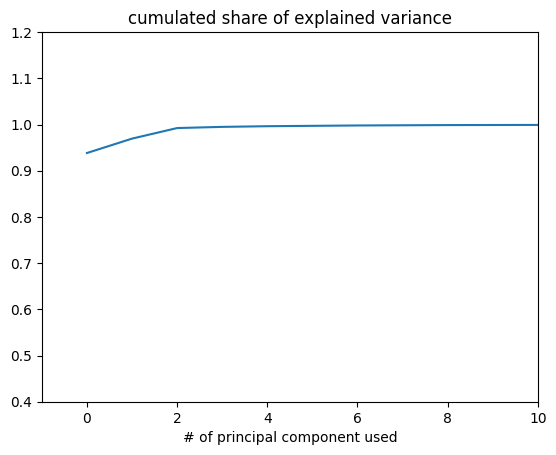

In [184]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0.4, 1.2])
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');
plt.xlim([-1, 10])

In [192]:
# Fit a PCA with only 3 components
pca2 = PCA(n_components=1).fit(X_train)

# Project your data into 3 dimensions
X_proj2 = pd.DataFrame(pca2.fit_transform(X_train), columns=['PC1'])

# We have "compressed" our dataset in 3D
X_proj2

#Check scores and compare: 
print(cross_val_score(RandomForestRegressor(), X_proj2, y_train, cv=5).mean())

#print("\naccuracy all 13 initial features")
#print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())

-0.5354562409813592


In [194]:
pd.set_option('display.max_columns', None)
df

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,pipeline__2023 Total Equity Gross Minority Interest,pipeline__2023 Stockholders Equity,pipeline__2023 Gains Losses Not Affecting Retained Earnings,pipeline__2023 Retained Earnings,pipeline__2023 Additional Paid In Capital,pipeline__2023 Capital Stock,pipeline__2023 Common Stock,pipeline__2023 Total Liabilities Net Minority Interest,pipeline__2023 Total Non Current Liabilities Net Minority Interest,pipeline__2023 Long Term Debt And Capital Lease Obligation,pipeline__2023 Long Term Capital Lease Obligation,pipeline__2023 Current Liabilities,pipeline__2023 Current Debt And Capital Lease Obligation,pipeline__2023 Payables And Accrued Expenses,pipeline__2023 Current Accrued Expenses,pipeline__2023 Payables,pipeline__2023 Accounts Payable,pipeline__2023 Total Assets,pipeline__2023 Total Non Current Assets,pipeline__2023 Goodwill And Other Intangible Assets,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents,pipeline__2023 Stock value,pipeline__2023 Ratio ticker sp500,pipeline__2022 Ordinary Shares Number,pipeline__2022 Share Issued,pipeline__2022 Total Debt,pipeline__2022 Tangible Book Value,pipeline__2022 Invested Capital,pipeline__2022 Working Capital,pipeline__2022 Net Tangible Assets,pipeline__2022 Capital Lease Obligations,pipeline__2022 Common Stock Equity,pipeline__2022 Total Capitalization,pipeline__2022 Total Equity Gross Minority Interest,pipeline__2022 Stockholders Equity,pipeline__2022 Gains Losses Not Affecting Retained Earnings,pipeline__2022 Retained Earnings,pipeline__2022 Additional Paid In Capital,pipeline__2022 Capital Stock,pipeline__2022 Common Stock,pipeline__2022 Total Liabilities Net Minority Interest,pipeline__2022 Total Non Current Liabilities Net Minority Interest,pipeline__2022 Long Term Debt And Capital Lease Obligation,pipeline__2022 Long Term Capital Lease Obligation,pipeline__2022 Current Liabilities,pipeline__2022 Current Debt And Capital Lease Obligation,pipeline__2022 Payables And Accrued Expenses,pipeline__2022 Current Accrued Expenses,pipeline__2022 Payables,pipeline__2022 Accounts Payable,pipeline__2022 Total Assets,pipeline__2022 Total Non Current Assets,pipeline__2022 Other Non Current Assets,pipeline__2022 Goodwill And Other Intangible Assets,pipeline__2022 Net PPE,pipeline__2022 Accumulated Depreciation,pipeline__2022 Gross PPE,pipeline__2022 Other Properties,pipeline__2022 Machinery Furniture Equipment,pipeline__2022 Current Assets,pipeline__2022 Receivables,pipeline__2022 Accounts Receivable,pipeline__2022 Cash Cash Equivalents And Short Term Investments,pipeline__2022 Cash And Cash Equivalents,pipeline__2022 Stock value,pipeline__2022 Ratio ticker sp500,pipeline__2021 Ordinary Shares Number,pipeline__2021 Share Issued,pipeline__2021 Total Debt,pipeline__2021 Tangible Book Value,pipeline__2021 Invested Capital,pipeline__2021 Working Capital,pipeline__2021 Net Tangible Assets,pipeline__2021 Capital Lease Obligations,pipeline__2021 Common Stock Equity,pipeline__2021 Total Capitalization,pipeline__2021 Total Equity Gross Minority Interest,pipeline__2021 Stockholders Equity,pipeline__2021 Gains Losses Not Affecting Retained Earnings,pipeline__2021 Retained Earnings,pipeline__2021 Additional Paid In Capital,pipeline__2021 Capital Stock,pipeline__2021 Common Stock,pipeline__2021 Total Liabilities Net Minority Interest,pipeline__2021 Total Non Current Liabiliti

# Trying models without ratio for 2023

In [202]:
X_new = df.drop(columns=["Ratio ticker sp500", "pipeline__2023 Ratio ticker sp500", 
                         "pipeline__2022 Ratio ticker sp500", 
                         "pipeline__2021 Ratio ticker sp500",
                        "pipeline__2020 Ratio ticker sp500"])


In [203]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

(-1.0, 10.0)

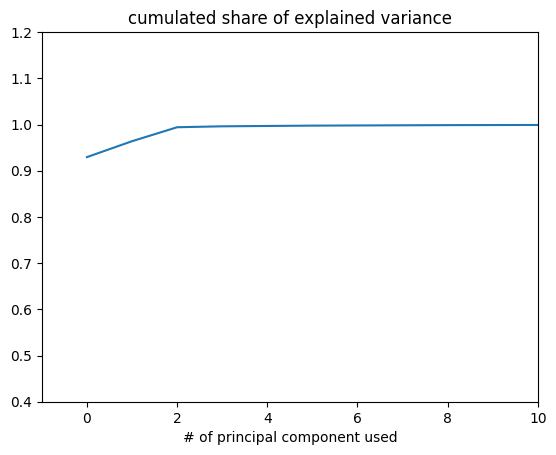

In [205]:
pca = PCA()
pca.fit(X_new_train)
X_proj = pca.transform(X_new_train)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 436)])

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0.4, 1.2])
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');
plt.xlim([-1, 10])

In [206]:
# Fit a PCA with only 3 components
pca2 = PCA(n_components=2).fit(X_new_train)

# Project your data into 3 dimensions
X_proj2 = pd.DataFrame(pca2.fit_transform(X_train), columns=['PC1', 'PC2'])

# We have "compressed" our dataset in 3D
X_proj2

#Check scores and compare: 
print(cross_val_score(RandomForestRegressor(), X_proj2, y_train, cv=5).mean())


-0.3005905317928642


## New Model: with just the ratios

In [215]:
X_reduced = df[[ "pipeline__2023 Ratio ticker sp500", 
                         "pipeline__2022 Ratio ticker sp500", 
                         "pipeline__2021 Ratio ticker sp500",
                        "pipeline__2020 Ratio ticker sp500"]]

In [216]:
X_reduced

,pipeline__2023 Ratio ticker sp500,pipeline__2022 Ratio ticker sp500,pipeline__2021 Ratio ticker sp500,pipeline__2020 Ratio ticker sp500
Ticker,,,,
AAL,0.110173,-0.090977,-0.006855,-0.747803
AAOI,17.045832,-0.781155,-0.905159,-0.533057
AAON,0.937091,0.512387,0.063391,0.508978
AAPL,0.587249,0.474382,0.061296,1.720461
ABCB,0.279406,0.407539,0.190881,-0.168701
...,...,...,...,...
ZION,-0.164430,0.069184,0.446055,-0.252012
ZKIN,-1.900304,-0.962432,1.593082,0.020274
ZLAB,-0.289921,-0.519939,-1.058512,3.386363


In [217]:
X_r_train, X_r_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3)

In [220]:
print(cross_val_score(RandomForestRegressor(), X_r_train, y_train, cv=5))#.mean())

[ 0.62457053 -0.3677873   0.30486875  0.58973182  0.1380633 ]
